In [1]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Read CSV
pd.set_option('display.max_columns', None)
raw_data = pd.read_csv("../Resources/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
raw_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,48.5,48.5,NaN,NaN,32.3,64.9,69,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(43.235541343, -108.109830353)",OWS,OWS1,Q037,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
1,2012,2012,DC,District of Columbia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.6,31.6,NaN,NaN,24.0,40.4,243,NaN,NaN,Less than high school,NaN,NaN,NaN,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,35.2,35.2,NaN,NaN,30.7,40.0,598,NaN,25 - 34,NaN,NaN,NaN,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,27.9,27.9,NaN,NaN,27.6,28.3,"266,452",NaN,NaN,NaN,Female,NaN,NaN,NaN,PA,PA1,Q047,VALUE,59,Gender,Female,GEN,FEMALE
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,16.9,16.9,NaN,NaN,16.0,17.8,"20,923",NaN,18 - 24,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824


In [3]:
trim_data = raw_data[["YearStart", "LocationAbbr", "LocationDesc", "Question", "Data_Value", "Age(years)", "Education",
                     "Race/Ethnicity", "Gender", "Income", "StratificationCategory1"]]
trim_data.head()

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Age(years),Education,Race/Ethnicity,Gender,Income,StratificationCategory1
0,2012,WY,Wyoming,Percent of adults aged 18 years and older who ...,48.5,NaN,NaN,American Indian/Alaska Native,NaN,NaN,Race/Ethnicity
1,2012,DC,District of Columbia,Percent of adults aged 18 years and older who ...,31.6,NaN,Less than high school,NaN,NaN,NaN,Education
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,35.2,25 - 34,NaN,NaN,NaN,NaN,Age (years)
3,2013,US,National,Percent of adults who engage in no leisure-tim...,27.9,NaN,NaN,NaN,Female,NaN,Gender
4,2011,US,National,Percent of adults who engage in no leisure-tim...,16.9,18 - 24,NaN,NaN,NaN,NaN,Age (years)


In [4]:
trim_data = trim_data.loc[(trim_data["Question"] == "Percent of adults aged 18 years and older who have obesity")]

In [ ]:
#Year view of obesity percentage

In [41]:
year_data = trim_data[["YearStart","Data_Value"]]
year_data.dropna()

,YearStart,Data_Value
1,2012,31.6
2,2011,35.2
11,2015,24.6
23,2012,25.6
28,2014,26.6
...,...,...
63012,2012,31.1
63014,2012,22.6
63017,2014,33.5
63019,2013,33.9


In [44]:
year_df = year_data.groupby("YearStart")

year_df.mean().head(15)

,Data_Value
YearStart,
2011,27.736411
2012,27.996622
2013,28.815848
2014,29.336158
2015,29.532550
2016,30.085817
2017,30.955904
2018,31.632798


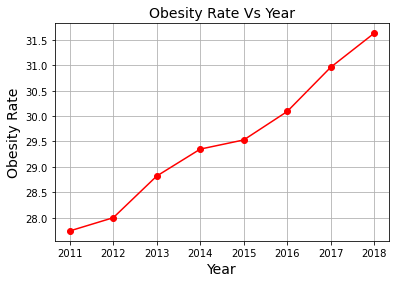

In [55]:
Year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Obesity_Rate = [27.74,28.00,28.82,29.35,29.53,30.09,30.96,31.63]

plt.plot(Year, Obesity_Rate, color='red', marker='o')
plt.title('Obesity Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Obesity Rate', fontsize=14)
plt.grid(True)
plt.show()

In [5]:
#Age vs. Avg Obesity Rate

In [6]:
age_data = trim_data[["YearStart", "LocationAbbr", "LocationDesc", "Data_Value", "Age(years)"]]
age_data.dropna()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Age(years)
2,2011,AL,Alabama,35.2,25 - 34
30,2015,NY,New York,29.7,35 - 44
87,2013,WA,Washington,33.3,45 - 54
91,2011,TN,Tennessee,32.5,55 - 64
103,2014,NM,New Mexico,33.2,25 - 34
...,...,...,...,...,...
62950,2014,TX,Texas,30.7,65 or older
62955,2013,TN,Tennessee,40.3,35 - 44
62996,2014,AR,Arkansas,29.2,65 or older
63008,2014,TN,Tennessee,39.3,45 - 54


In [7]:
age_data.dtypes

YearStart         int64
LocationAbbr     object
LocationDesc     object
Data_Value      float64
Age(years)       object
dtype: object

In [8]:
age_df = age_data.groupby("Age(years)")

age_df.count().head(15)

,YearStart,LocationAbbr,LocationDesc,Data_Value
Age(years),,,,
18 - 24,430,430,430,428
25 - 34,430,430,430,428
35 - 44,430,430,430,428
45 - 54,430,430,430,428
55 - 64,430,430,430,428
65 or older,430,430,430,428


In [9]:
age_mean_df = age_df.mean()["Data_Value"]
age_mean_df

Age(years)
18 - 24        16.801402
25 - 34        27.866121
35 - 44        32.976168
45 - 54        34.685981
55 - 64        34.018458
65 or older    27.246262
Name: Data_Value, dtype: float64

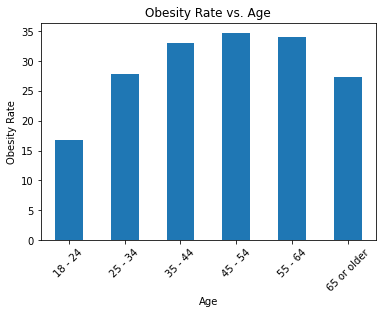

In [54]:
%matplotlib inline
age_mean_df.plot(kind='bar', rot=45)

plt.xlabel("Age")
plt.ylabel("Obesity Rate")
plt.title("Obesity Rate vs. Age")

  
plt.show()
#plt.tight_layout()

In [11]:
#Income_Data

In [12]:
income_data = trim_data[["YearStart", "LocationAbbr", "LocationDesc", "Data_Value", "Income"]]
income_data.dropna()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Income
11,2015,GA,Georgia,24.6,"$75,000 or greater"
28,2014,TN,Tennessee,26.6,"$75,000 or greater"
31,2015,FL,Florida,30.0,"$15,000 - $24,999"
35,2014,KS,Kansas,33.2,"$35,000 - $49,999"
96,2011,GA,Georgia,33.9,"Less than $15,000"
...,...,...,...,...,...
62985,2014,IA,Iowa,34.7,"$25,000 - $34,999"
62997,2011,WI,Wisconsin,37.1,"Less than $15,000"
63012,2012,AZ,Arizona,31.1,"Less than $15,000"
63017,2014,OK,Oklahoma,33.5,"$25,000 - $34,999"


In [13]:
income_df = income_data.groupby("Income")

income_df.count().head(15)

,YearStart,LocationAbbr,LocationDesc,Data_Value
Income,,,,
"$15,000 - $24,999",430,430,430,428
"$25,000 - $34,999",430,430,430,428
"$35,000 - $49,999",430,430,430,428
"$50,000 - $74,999",430,430,430,428
"$75,000 or greater",430,430,430,428
Data not reported,430,430,430,428
"Less than $15,000",430,430,430,428


In [14]:
income_mean_df = income_df.mean()["Data_Value"]
income_mean_df

Income
$15,000 - $24,999     32.871963
$25,000 - $34,999     31.136682
$35,000 - $49,999     30.976636
$50,000 - $74,999     30.314953
$75,000 or greater    25.968692
Data not reported     24.901869
Less than $15,000     34.405607
Name: Data_Value, dtype: float64

In [15]:
income_index = income_mean_df.reindex(['Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999', '$35,000 - $49,999', "$50,000 - $74,999","$75,000 or greater"])
income_index

Income
Less than $15,000     34.405607
$15,000 - $24,999     32.871963
$25,000 - $34,999     31.136682
$35,000 - $49,999     30.976636
$50,000 - $74,999     30.314953
$75,000 or greater    25.968692
Name: Data_Value, dtype: float64

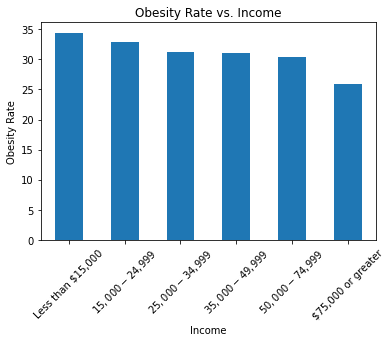

In [16]:
%matplotlib inline
income_index.plot(kind='bar', rot=45)

plt.xlabel("Income")
plt.ylabel("Obesity Rate")
plt.title("Obesity Rate vs. Income")

plt.show()
#plt.tight_layout()

In [17]:
#gender

In [18]:
gender_data = trim_data[["YearStart", "LocationAbbr", "LocationDesc", "Data_Value", "Gender"]]
gender_data.dropna()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Gender
513,2014,AZ,Arizona,28.8,Female
630,2013,NV,Nevada,25.9,Male
672,2016,DE,Delaware,30.7,Female
714,2016,FL,Florida,28.3,Male
798,2016,AL,Alabama,36.2,Male
...,...,...,...,...,...
62491,2012,OR,Oregon,27.4,Male
62583,2015,VA,Virginia,29.7,Female
62703,2011,MT,Montana,25.8,Male
62766,2015,UT,Utah,24.9,Male


In [19]:
gender_df = gender_data.groupby("Gender")

gender_df.count().head(15)

,YearStart,LocationAbbr,LocationDesc,Data_Value
Gender,,,,
Female,430,430,430,428
Male,430,430,430,428


In [20]:
gender_mean_df = gender_df.mean()["Data_Value"]
gender_mean_df

Gender
Female    29.134813
Male      29.488785
Name: Data_Value, dtype: float64

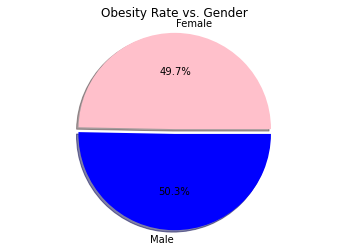

In [39]:
colors = ["pink", "blue"]
labels = 'Female', 'Male'
explode = (0, 0.05)

plt.pie(gender_mean_df, colors=colors, labels=labels, explode=explode, shadow=True, autopct="%1.1f%%")
plt.title("Obesity Rate vs. Gender")
plt.axis("equal")


plt.show()

In [23]:
#Education

In [24]:
education_data = trim_data[["YearStart", "LocationAbbr", "LocationDesc", "Data_Value", "Education"]]
education_data.dropna()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Education
1,2012,DC,District of Columbia,31.6,Less than high school
34,2011,VT,Vermont,33.1,High school graduate
54,2014,DE,Delaware,33.0,Some college or technical school
272,2015,NE,Nebraska,29.6,Less than high school
312,2011,MA,Massachusetts,25.2,High school graduate
...,...,...,...,...,...
62915,2014,FL,Florida,27.4,High school graduate
62958,2015,RI,Rhode Island,32.1,Less than high school
62969,2014,RI,Rhode Island,30.8,High school graduate
62973,2014,WY,Wyoming,25.2,College graduate


In [25]:
education_df = education_data.groupby("Education")

education_df.count().head(15)

,YearStart,LocationAbbr,LocationDesc,Data_Value
Education,,,,
College graduate,430,430,430,428
High school graduate,430,430,430,428
Less than high school,430,430,430,428
Some college or technical school,430,430,430,428


In [26]:
education_mean_df = education_df.mean()["Data_Value"]
education_mean_df

Education
College graduate                    23.408645
High school graduate                31.516589
Less than high school               33.466822
Some college or technical school    30.799065
Name: Data_Value, dtype: float64

In [27]:
education_index = education_mean_df.reindex(['Less than high school','High school graduate', 'Some college or technical school', 'College graduate'])
education_index

Education
Less than high school               33.466822
High school graduate                31.516589
Some college or technical school    30.799065
College graduate                    23.408645
Name: Data_Value, dtype: float64

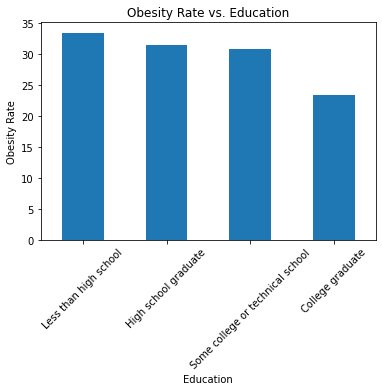

In [28]:
%matplotlib inline
education_index.plot(kind='bar',rot=45)

plt.xlabel("Education")
plt.ylabel("Obesity Rate")
plt.title("Obesity Rate vs. Education")



plt.show()
#plt.tight_layout()